In [3]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import time
import os

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
headers = ['tfl_id','bikes','spaces','total_docks','timestamp']

In [4]:
df = pd.read_csv("176-01-ind_dublinalt.csv", parse_dates=True, index_col='timestamp', names=headers)

In [ ]:
df.head(2)

In [6]:
df = df[df['tfl_id']==43]

In [8]:
df.head(2)

,tfl_id,bikes,spaces,total_docks
timestamp,,,,
2011-03-02 06:20:02,43,0,0,0
2011-03-02 06:30:01,43,3,27,0


In [9]:
df.tail(2)

,tfl_id,bikes,spaces,total_docks
timestamp,,,,
2018-06-28 16:44:02,43,8,22,30
2018-06-28 16:46:02,43,8,22,30


In [10]:
df = df.loc['2014-06-28':'2018-06-28']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 963632 entries, 2014-06-28 00:00:01 to 2018-06-28 16:46:02
Data columns (total 4 columns):
tfl_id         963632 non-null int64
bikes          963632 non-null int64
spaces         963632 non-null int64
total_docks    963632 non-null int64
dtypes: int64(4)
memory usage: 36.8 MB


In [10]:
#df = df.reset_index()

In [12]:
df.to_csv('2014-2018_Station34.csv')

In [5]:
df = pd.read_csv('2014-2018_Station34.csv', parse_dates=True, index_col='timestamp')


In [6]:
df.head(2)

,tfl_id,bikes,spaces,total_docks
timestamp,,,,
2014-06-28 00:00:01,43,30,0,0
2014-06-28 00:10:01,43,30,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 963632 entries, 2014-06-28 00:00:01 to 2018-06-28 16:46:02
Data columns (total 4 columns):
tfl_id         963632 non-null int64
bikes          963632 non-null int64
spaces         963632 non-null int64
total_docks    963632 non-null int64
dtypes: int64(4)
memory usage: 36.8 MB


In [8]:
df['deposit'] = df['bikes'].diff().fillna(0).astype(int)

In [9]:
df.head()

,tfl_id,bikes,spaces,total_docks,deposit
timestamp,,,,,
2014-06-28 00:00:01,43,30,0,0,0
2014-06-28 00:10:01,43,30,0,0,0
2014-06-28 00:20:02,43,30,0,0,0
2014-06-28 00:30:02,43,30,0,0,0
2014-06-28 00:40:02,43,29,1,0,-1


In [10]:
df['deposit_lag'] = df['bikes'].shift().fillna(0).astype(int)

In [11]:
df['deposit_lag'] = df['deposit_lag'].fillna(0).astype(int)

In [13]:
df.head(5)

,tfl_id,bikes,spaces,total_docks,deposit,deposit_lag
timestamp,,,,,,
2014-06-28 00:00:01,43,30,0,0,0,0
2014-06-28 00:10:01,43,30,0,0,0,30
2014-06-28 00:20:02,43,30,0,0,0,30
2014-06-28 00:30:02,43,30,0,0,0,30
2014-06-28 00:40:02,43,29,1,0,-1,30


In [14]:
df['deposit_flag'] = df['deposit'] > 6

In [15]:
df['deposit_flag'] = df['deposit_flag'].fillna(0).astype(int)

In [16]:
df[df['deposit_flag']== 1].count()

tfl_id          915
bikes           915
spaces          915
total_docks     915
deposit         915
deposit_lag     915
deposit_flag    915
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 963632 entries, 2014-06-28 00:00:01 to 2018-06-28 16:46:02
Data columns (total 7 columns):
tfl_id          963632 non-null int64
bikes           963632 non-null int64
spaces          963632 non-null int64
total_docks     963632 non-null int64
deposit         963632 non-null int64
deposit_lag     963632 non-null int64
deposit_flag    963632 non-null int64
dtypes: int64(7)
memory usage: 58.8 MB


In [44]:
df.head(2)

,bikes,spaces,total_docks
timestamp,,,
2014-06-28 00:00:01,30,0,0
2014-06-28 00:10:01,30,0,0


In [45]:
#df['day'] = df.index.map(lambda x: x.strftime('%d'))

In [46]:
df['weekday'] = df.index.map(lambda x: x.strftime('%w'))

In [47]:
df['hour'] = df.index.map(lambda x: x.strftime('%-H'))

In [48]:
df['Minute'] = df.index.map(lambda x: x.strftime('%-M'))

In [13]:
#df['AMPM'] = df.index.map(lambda x: x.strftime('%p'))

In [49]:
#df['dayofyear'] = df.index.map(lambda x: x.strftime('%j'))

In [50]:
df['weeknumber'] = df.index.map(lambda x: x.strftime('%W'))

In [1]:
df.tail()

NameError: name 'df' is not defined

In [19]:
df = pd.read_csv('f_features.csv')

In [20]:
df['withdrawal'] = df['bikes'].diff().fillna(0)

In [21]:
df['withdrawal_flag'] = df['bikes'].diff().fillna(0).astype(int) > 6

In [22]:
# you cannot spell 
df['deposit'] = df['spaces'].diff().fillna(0)

In [23]:
#this needs to be a bit smarter. when the station was created there was a deposit of 27 bikes! 
#so its valid but not what we are looking for
df['deposit_flag'] = df['spaces'].diff().fillna(0) > 6

In [77]:
#df[df['withdrawal'] == True]

In [81]:
#df[df['despos'] == True]

In [94]:
#df.drop(['desposit'], axis = 1, inplace = True)

In [24]:
df['deposit_flag'] = df['deposit_flag'].astype(int)

In [25]:
df['withdrawal_flag'] = df['withdrawal_flag'].astype(int)

In [26]:
#df.to_csv('features_ready.csv')

In [27]:
df.tail(2)

,timestamp,tfl_id,bikes,spaces,total_docks,month,day,weekday,hour,Minute,dayofyear,weeknumber,withdrawal,withdrawal_flag,deposit,deposit_flag
1136826,2018-06-28 16:38:02,43,7,23,30,6,28,4,16,38,179,26,0.0,0,0.0,0
1136827,2018-06-28 16:40:02,43,6,24,30,6,28,4,16,40,179,26,-1.0,0,1.0,0
1136828,2018-06-28 16:42:03,43,8,22,30,6,28,4,16,42,179,26,2.0,0,-2.0,0
1136829,2018-06-28 16:44:02,43,8,22,30,6,28,4,16,44,179,26,0.0,0,0.0,0
1136830,2018-06-28 16:46:02,43,8,22,30,6,28,4,16,46,179,26,0.0,0,0.0,0


In [79]:
df2['withdrawal_flag'].value_counts()

0    1134375
1       2456
Name: withdrawal_flag, dtype: int64

In [77]:
df2['deposit_flag'].value_counts()

0    1134500
1       2331
Name: deposit_flag, dtype: int64

In [40]:
sns.set(style="darkgrid")

In [41]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")

In [45]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>

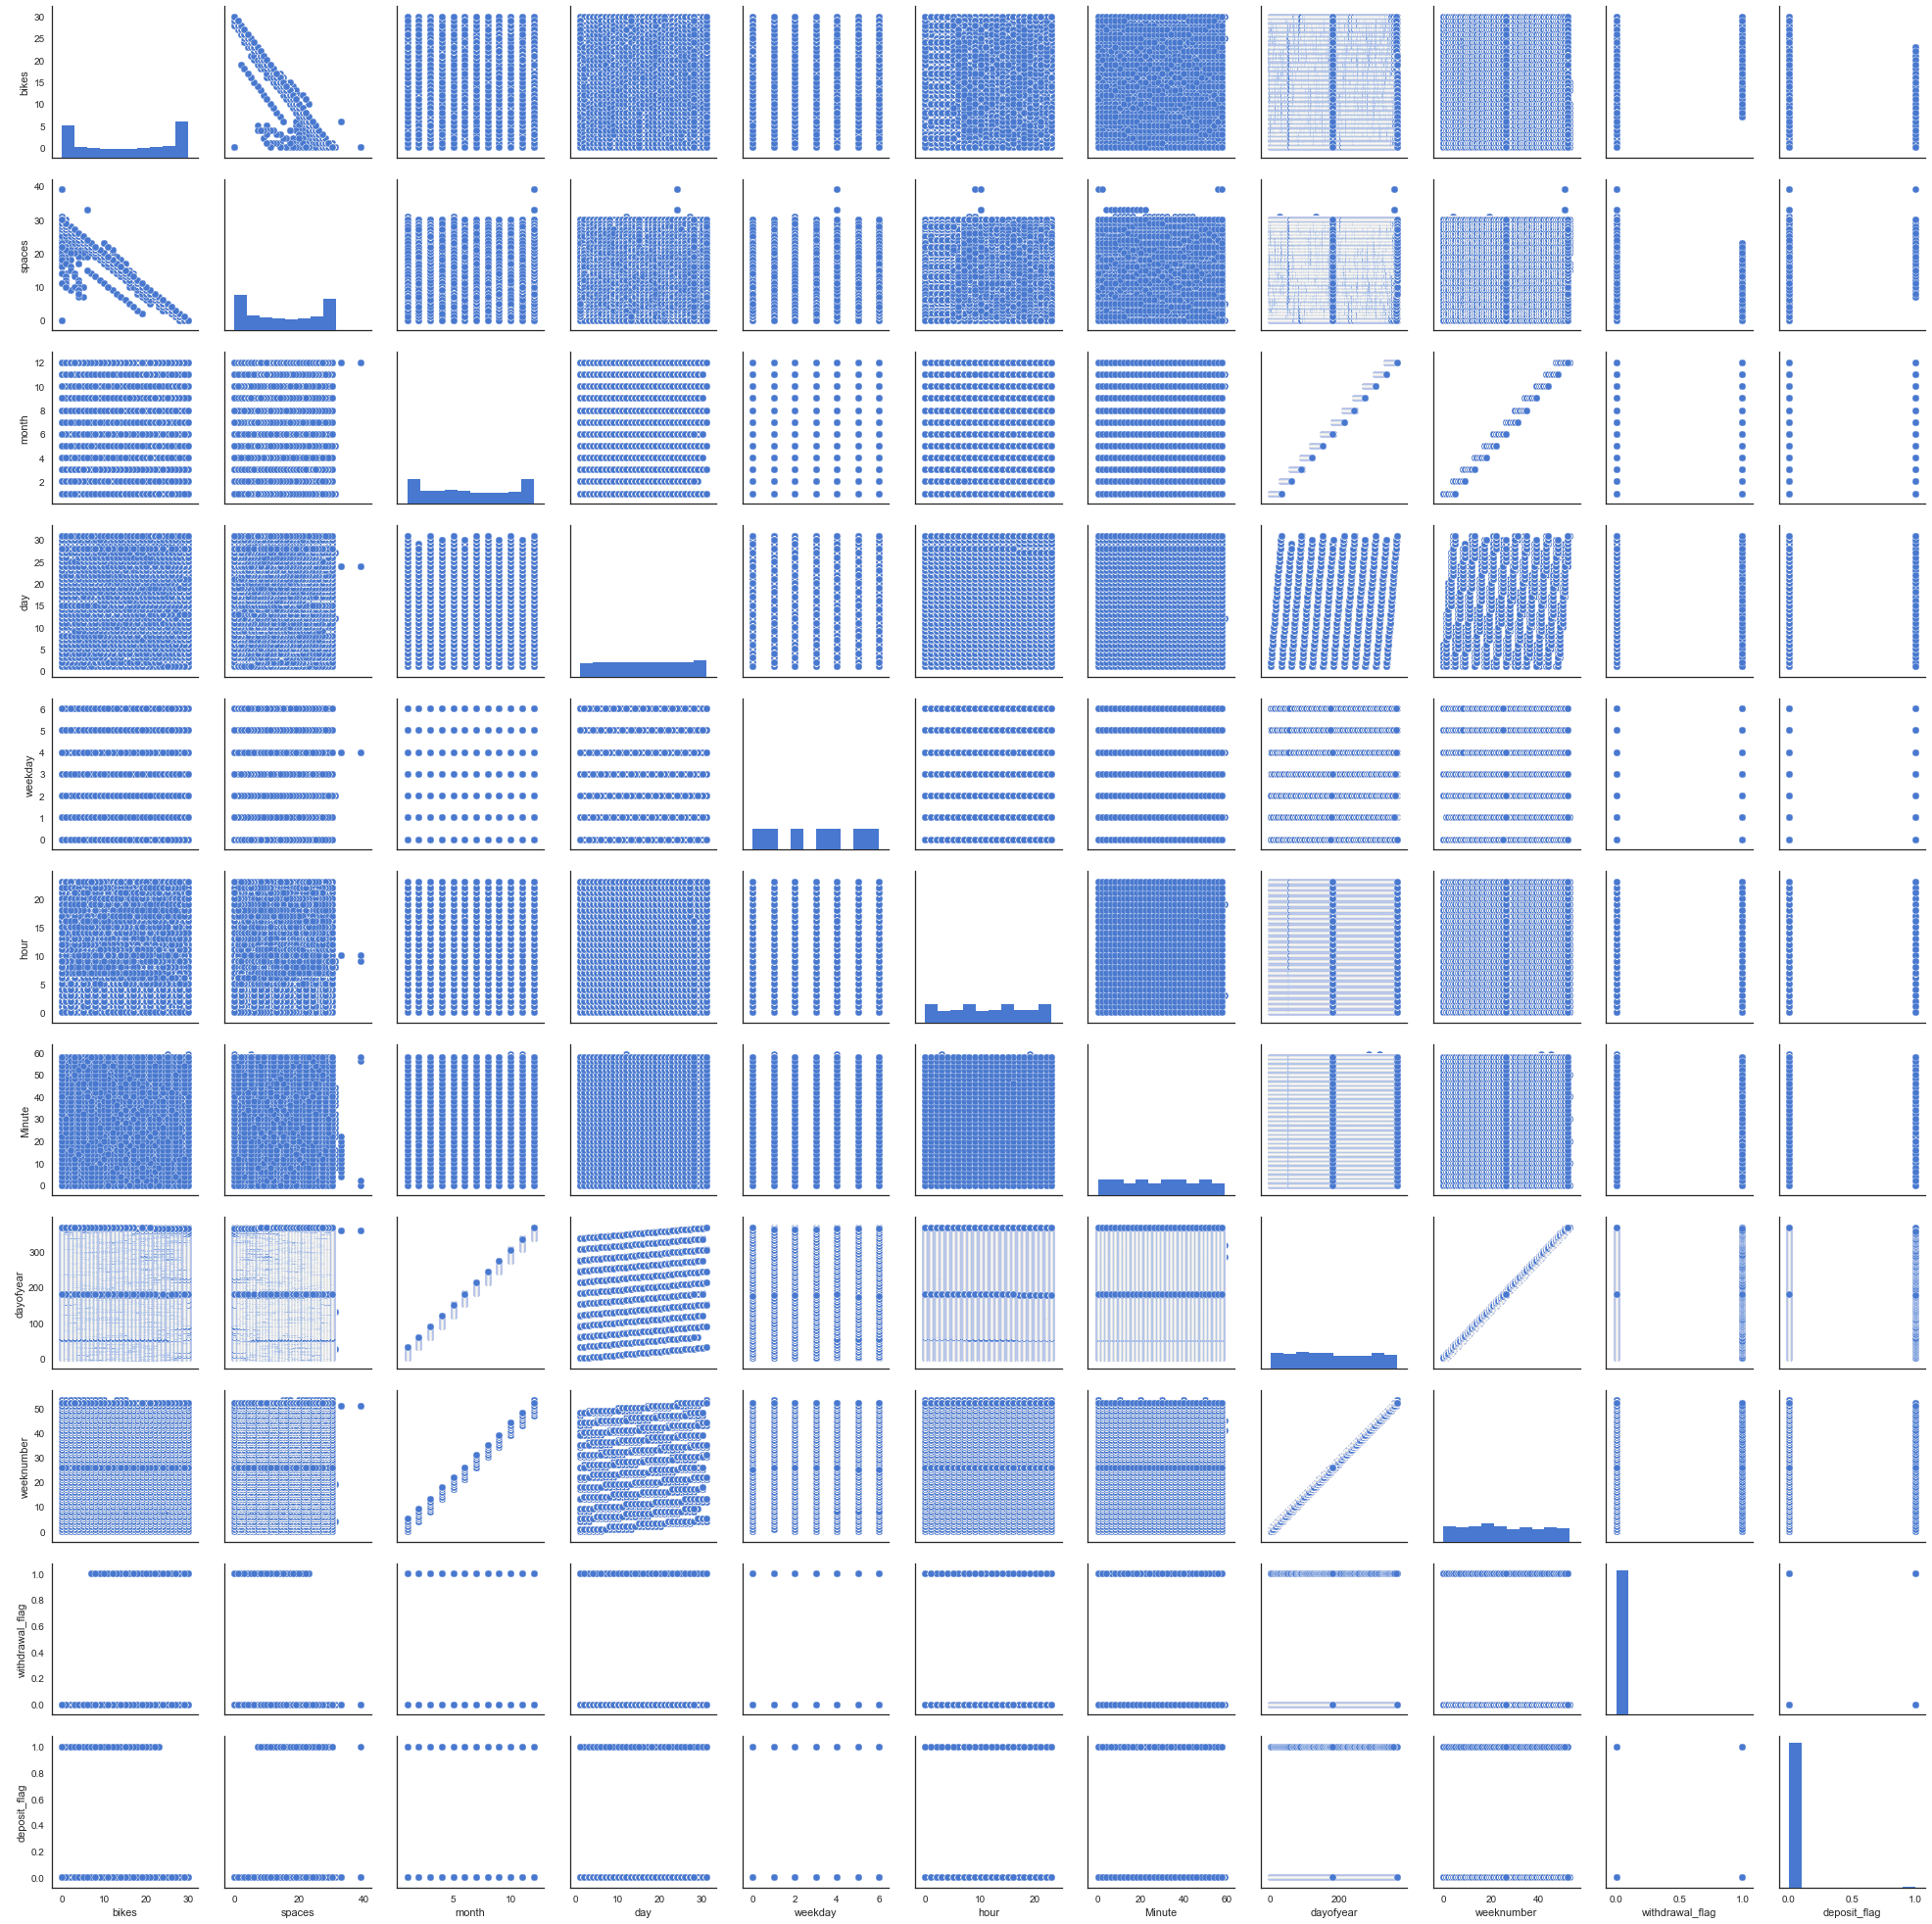

In [44]:
sns.pairplot(df2)

In [ ]:
#plt.scatter(df2['month'], df2['desposit_flag']==1)

In [80]:
x = df2['2018-06':'2018-05']

KeyError: '2018-06'

In [48]:
y = df2.loc[(df2['2018-05':'2018-06']) & df2['withdrawal_flag'] == 1]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2018-05] of <class 'str'>

In [49]:
plt.scatter(x, y)

NameError: name 'x' is not defined

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1136831 entries, 2011-03-02 06:20:02 to 2018-06-28 16:46:02
Data columns (total 11 columns):
bikes              1136831 non-null int64
spaces             1136831 non-null int64
month              1136831 non-null int64
day                1136831 non-null int64
weekday            1136831 non-null int64
hour               1136831 non-null int64
Minute             1136831 non-null int64
dayofyear          1136831 non-null int64
weeknumber         1136831 non-null int64
withdrawal_flag    1136831 non-null int64
deposit_flag       1136831 non-null int64
dtypes: int64(11)
memory usage: 144.1+ MB


In [61]:
df2.index

RangeIndex(start=0, stop=1136831, step=1)

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1136831 entries, 2011-03-02 06:20:02 to 2018-06-28 16:46:02
Data columns (total 11 columns):
bikes              1136831 non-null int64
spaces             1136831 non-null int64
month              1136831 non-null int64
day                1136831 non-null int64
weekday            1136831 non-null int64
hour               1136831 non-null int64
Minute             1136831 non-null int64
dayofyear          1136831 non-null int64
weeknumber         1136831 non-null int64
withdrawal_flag    1136831 non-null int64
deposit_flag       1136831 non-null int64
dtypes: int64(11)
memory usage: 144.1+ MB


In [71]:
df2['time'] = df2.index.map(lambda x: x.strftime('%H:%M'))

AttributeError: 'str' object has no attribute 'strftime'

In [90]:
df2.to_csv('features2.csv')